In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [3]:
data = pd.read_csv("bank_transactions.csv")

In [6]:
data[["CustGender", "TransactionAmount (INR)"]].groupby("CustGender").sum()

,TransactionAmount (INR)
CustGender,
F,4.668110e+08
M,1.181645e+09
T,3.250000e+04


### Deal with missing values

In [21]:
data.isna().sum()


TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data[["CustGender", "TransactionAmount (INR)"]].groupby("CustGender").sum()

,TransactionAmount (INR)
CustGender,
F,4.613523e+08
M,1.169883e+09
T,3.250000e+04


In [37]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5


### Let's convert do datetime

In [9]:
data.TransactionTime = data.TransactionTime.apply(lambda x: dt.strptime(str(x).zfill(6), '%H%M%S').time())

In [10]:
data.CustomerDOB = pd.to_datetime(data.CustomerDOB)

In [11]:
data.TransactionDate = pd.to_datetime(data.TransactionDate)

### Let's clean the data

Let's plot the distribution of CustomerDOB

<AxesSubplot:>

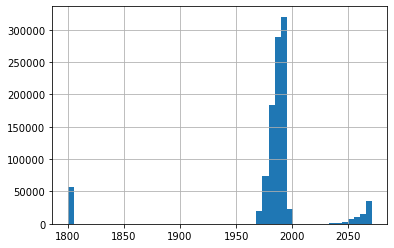

In [29]:
data.CustomerDOB.dt.year.hist(bins=50)

In [30]:
data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] - pd.DateOffset(years = 100)

In [31]:
data.drop(data[data.CustomerDOB.dt.year == 1800].index, axis=0, inplace=True)

<AxesSubplot:>

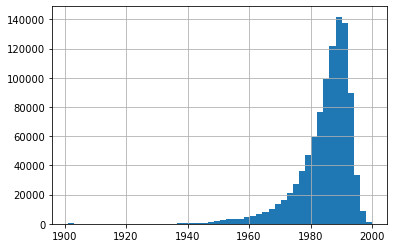

In [32]:
data.CustomerDOB.dt.year.hist(bins=50)

<AxesSubplot:>

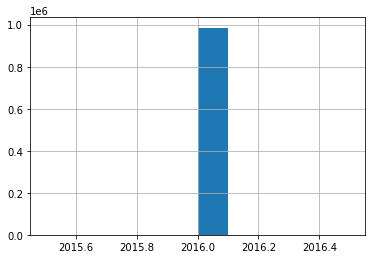

In [39]:
data.TransactionDate.dt.year.hist(bins=10)

## 2.1 Getting your data + feature engineering

a) Number of transaction

In [43]:
transaction = data[["CustomerID","TransactionID"]].groupby(by="CustomerID").count()

In [45]:
transaction.rename(columns={"TransactionID":"Number_Transaction"}, inplace=True)
transaction.head()

,Number_Transaction
CustomerID,
C1010011,2
C1010012,1
C1010014,2
C1010018,1
C1010024,1
